# Day 03: MSE and Linear Regression
No model is perfect; there will always be some error. Some of the error cannot be reduced (irreducible) but some of the error CAN be reduced. The latter is what we must try and reduce as much as possible.

In [1]:
import numpy as np
import pandas as pd

insurance = pd.read_csv('insurance.csv')

**What is Error? How do we calculate it?** \
Error (or noise) is the inevitable variance we encounter in the real life. No matter how perfect we can try to create a model to predict an outcome, there is the chance for variance and the unexpected. Thus, creating the "perfect" model is actually NOT a good idea; the perfect model does not account for errors / variance in data, and will be too accurate for the real world. That said, we don't want too much error, as that will lead to a model that is just simply wrong.

In mathematical terms, error is calculated by finding the difference between the model's predicted output, and the actual result. This can be done by creating said model by way of a mathematical equation in the format of:

f(x) = Bx + I + E

Where:\
*x* is the data being inputted\
*B* is the coefficient(s) calculated\
*I* is the intercept where no data is being inputted (think of y-intercept)\
*E* is the irreducible error (random error that we can not ignore)\
*f(X)* is the model's predicted outputs

Say *Y* is the actual reported result of the data in *x*. The error would then be:

Error = Y - f(x)

Keep in mind that the irreducible error is not a set number. It is impossible to find a consistent number for this value, as this represents a random error value that may change for every data of *x*. The inclusion of *E* in the formula above is to show where it stands in a formula; no model will be able to predict a value for it.


**MSE- Mean Squared Error**\
The average of the squared errors. Find the errors by finding the difference between the model's predicted values (ŷ) and the actual values (y) for the observations of 𝒳. Sum the squared values of the errors, then find the mean of the squared sum (MSE).\
We want a MSE value that is small, as that means less error. However, a MSE that is too small can lead to overfitting (too accurate and including the data's noise (irreducible error)) into the model.

Example: A very small MSE for a training dataset will lead to a very accurate model that may be lead to excellent responses for the train-response data. However, applying the same model - which may look very accurate - can lead to poor performance on the testing dataset, because the model can be overfitting on the trainiing data's noise, and not be as general/applicable to variances in the testing data.

## Simple Linear Regression

### Using Sklearn

In [2]:
from sklearn.linear_model import LinearRegression

Use `bmi` as the X to predict `charges` y.

In [3]:
# Sklearn takes numpy arrays
# Sklearn DOES NOT take pandas dataframes
X = insurance['bmi'].values # Extract the values from the dataframe to create a 1D array (horizontal)
X = X.reshape([len(X),1]) # Reshape X to create a 2D array (vertical)

y = insurance['charges'].values
y = y.reshape([len(y), 1])

In [4]:
linreg_model = LinearRegression().fit(X,y)

In [5]:
print(linreg_model.coef_)
print(linreg_model.intercept_)

[[393.8730308]]
[1192.93720896]


The coefficient is the value that you multiply with the X-values.\
The intercept is the y-intercept of the model. Where x=0


The formula would be:\
**Y = 393.8730308(𝒳) + 393.8730308**

To visualize:

In [6]:
import matplotlib.pyplot as plt

In [7]:
predictions = []
for b in insurance['bmi']:
    charge_predict = 393.8730308*b + 393.8730308
    predictions.append(charge_predict)

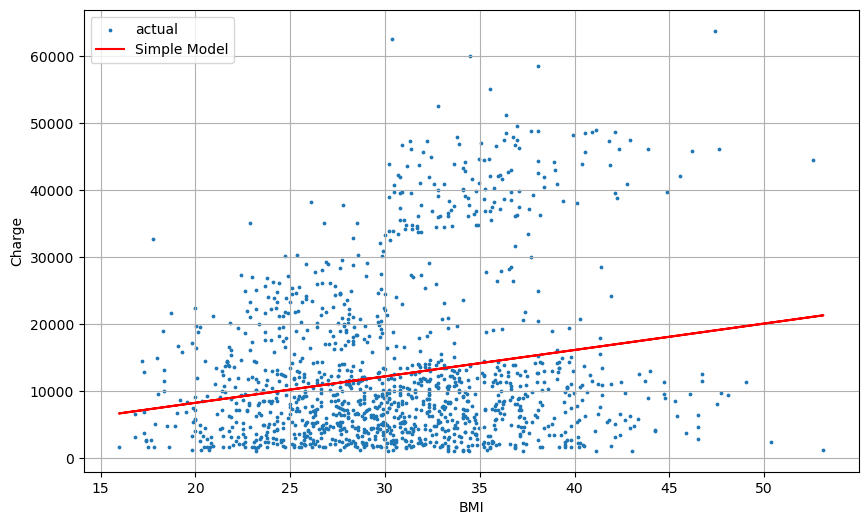

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(insurance.bmi, insurance.charges, s=3, label='actual')
plt.plot(insurance.bmi, predictions, c='r', label='Simple Model')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Charge')
plt.grid()

#### Plot using Seaborn
Seaborn's `.regplot` will automatically perform a regression on the relationship between variables. BUT this only works with single-variable regressions; it will not be able to perform multi-variable regression.\
In addition, this does not output a model, only: a plot, regression line (line of best-fit), and a confidence interval. There is no way to extract the intercepts, coefficients, or regression formula out of this function.

But for this demonstration, this will do.

In [9]:
import seaborn as sns

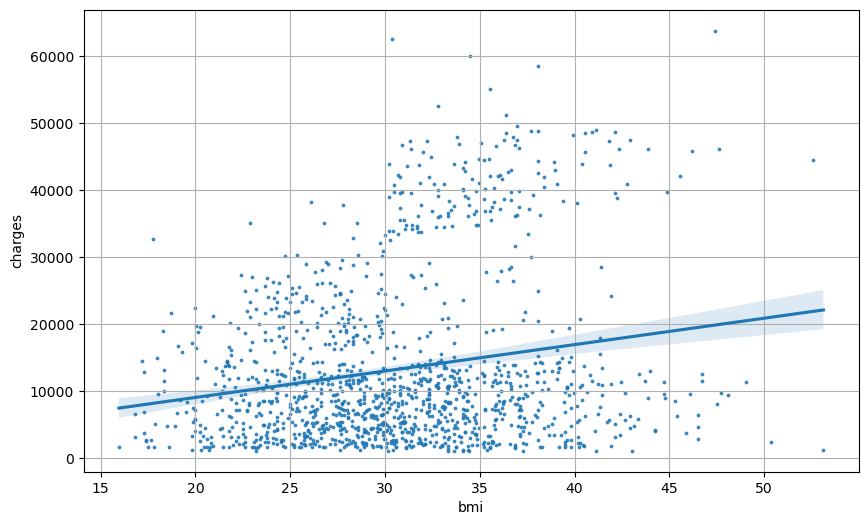

In [10]:
plt.figure(figsize=(10,6))
sns.regplot(x = insurance.bmi,y = insurance.charges, scatter_kws={'s':3})
plt.grid()

Clearly not a good model. But what did we expect using a single variable linear regression model?

### Using Statsmodels
Unlike sklearn, **statsmodels** will provide statistical information on a model formatted as a nice easy-to-read table.

In [11]:
import statsmodels.formula.api as smf

In [12]:
Check lec03 and lect02 mse

SyntaxError: invalid syntax (914931477.py, line 1)